In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

combined_df = pd.merge(clinical_df, mouse_df, how="left", on="Mouse ID")
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
mean_tumor_vol = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

mean_df = pd.DataFrame(mean_tumor_vol).reset_index()
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_vol = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
se_df = pd.DataFrame(se_tumor_vol).reset_index()
# Preview DataFrame
se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = mean_df.pivot_table("Tumor Volume (mm3)", "Timepoint", "Drug")
# Preview that Reformatting worked
reformat_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


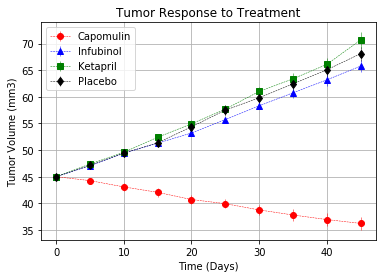

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(reformat_df.index, reformat_df["Capomulin"], se_df.loc[se_df["Drug"]=="Capomulin"]["Tumor Volume (mm3)"], \
         color='red', marker='o', linestyle='dashed', linewidth=0.5)
plt.errorbar(reformat_df.index, reformat_df["Infubinol"], se_df.loc[se_df["Drug"]=="Infubinol"]["Tumor Volume (mm3)"], \
         color='blue', marker='^', linestyle='dashed', linewidth=0.5)
plt.errorbar(reformat_df.index, reformat_df["Ketapril"], se_df.loc[se_df["Drug"]=="Ketapril"]["Tumor Volume (mm3)"], \
         color='green', marker='s', linestyle='dashed', linewidth=0.5)
plt.errorbar(reformat_df.index, reformat_df["Placebo"], se_df.loc[se_df["Drug"]=="Placebo"]["Tumor Volume (mm3)"], \
         color='black', marker='d', linestyle='dashed', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
# Save the Figure
plt.savefig("Images/Tumor Response to Treatment.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_sites = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
mean_meta_sites_df = pd.DataFrame(mean_meta_sites).reset_index()
# Preview DataFrame
mean_meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_meta_sites = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
se_meta_sites_df = pd.DataFrame(se_meta_sites).reset_index()
# Preview DataFrame
se_meta_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
reformat_meta_sites_df = mean_meta_sites_df.pivot_table("Metastatic Sites", "Timepoint", "Drug")
# Preview that Reformatting worked
reformat_meta_sites_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


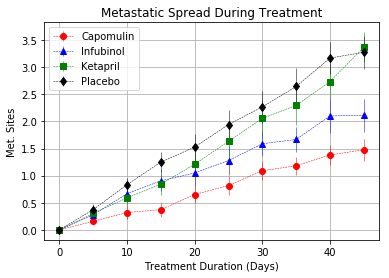

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(reformat_meta_sites_df.index, reformat_meta_sites_df["Capomulin"], \
             se_meta_sites_df.loc[se_df["Drug"]=="Capomulin"]["Metastatic Sites"], \
             color='red', marker='o', linestyle='dashed', linewidth=0.5)
plt.errorbar(reformat_meta_sites_df.index, reformat_meta_sites_df["Infubinol"], \
             se_meta_sites_df.loc[se_df["Drug"]=="Infubinol"]["Metastatic Sites"], \
             color='blue', marker='^', linestyle='dashed', linewidth=0.5)
plt.errorbar(reformat_meta_sites_df.index, reformat_meta_sites_df["Ketapril"], \
             se_meta_sites_df.loc[se_df["Drug"]=="Ketapril"]["Metastatic Sites"], \
             color='green', marker='s', linestyle='dashed', linewidth=0.5)
plt.errorbar(reformat_meta_sites_df.index, reformat_meta_sites_df["Placebo"], \
             se_meta_sites_df.loc[se_df["Drug"]=="Placebo"]["Metastatic Sites"], \
             color='black', marker='d', linestyle='dashed', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
# Save the Figure
plt.savefig("Images/Metastatic Spread During Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mouse_df = pd.DataFrame(mouse_count).reset_index()
mouse_df = mouse_df.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mouse_df = mouse_df.pivot_table("Mouse Count", "Timepoint", "Drug")
# Preview the Data Frame
reformat_mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


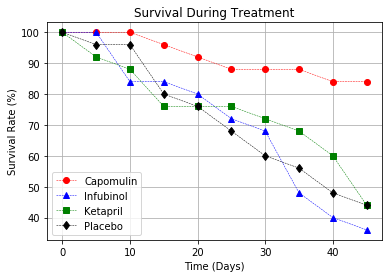

In [12]:
# Generate the Plot (Accounting for percentages)
plt.plot(reformat_mouse_df.index, reformat_mouse_df["Capomulin"]/reformat_mouse_df["Capomulin"][0]*100, \
         color='red', marker='o', linestyle='dashed', linewidth=0.5)
plt.plot(reformat_mouse_df.index, reformat_mouse_df["Infubinol"]/reformat_mouse_df["Infubinol"][0]*100, \
         color='blue', marker='^', linestyle='dashed', linewidth=0.5)
plt.plot(reformat_mouse_df.index, reformat_mouse_df["Ketapril"]/reformat_mouse_df["Ketapril"][0]*100, \
         color='green', marker='s', linestyle='dashed', linewidth=0.5)
plt.plot(reformat_mouse_df.index, reformat_mouse_df["Placebo"]/reformat_mouse_df["Placebo"][0]*100, \
         color='black', marker='d', linestyle='dashed', linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
# Save the Figure
plt.savefig("Images/Survival During Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
change = (reformat_df.iloc[-1,:] - reformat_df.iloc[0,:]) / reformat_df.iloc[0,:] *100
# Display the data to confirm
change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

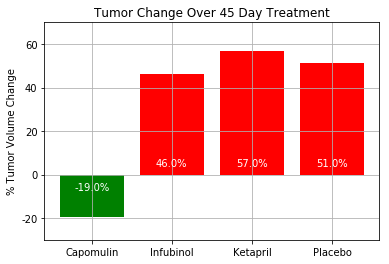

In [14]:
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
for drug in drugs:
    if change[drug] > 0:
        color = "red"
        bar = plt.bar(drug, change[drug], color=color)
        for rect in bar:
            plt.text(rect.get_x() + rect.get_width()/2.0, 3, '%s' % str(round(change[drug]))+"%", ha='center', va='bottom', color="white")
    else:
        color = "green"
        bar = plt.bar(drug, change[drug], color=color)
        for rect in bar:
            plt.text(rect.get_x() + rect.get_width()/2.0, -8, '%s' % str(round(change[drug]))+"%", ha='center', va='bottom', color="white")

        
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(-30,70)
y = np.arange(-20,80,20)
plt.yticks(y, ('-20', '0', '20', '40', '60'))
plt.savefig("Images/Tumor Change Over 45 Day Treatment.png")
plt.show()